In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


## Splitting & Using GB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

lgb_classifier = lgb.LGBMClassifier()

lgb_classifier.fit(X_train, y_train)
y_pred = lgb_classifier.predict(X_test)


[LightGBM] [Info] Number of positive: 332, number of negative: 268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1749
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553333 -> initscore=0.214148
[LightGBM] [Info] Start training from score 0.214148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Using Evaluation Metrics

Accuracy =  95.33333333333334 %
Precision =  0.9554618768328447
Recall =  0.9497737556561086
F1-score =  0.9522097310090574


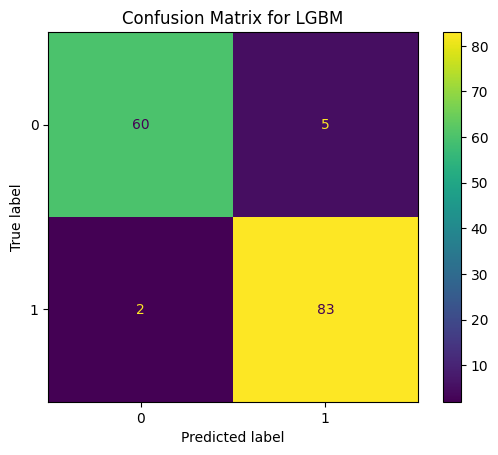

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        65
           1       0.94      0.98      0.96        85

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for LGBM')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 60
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

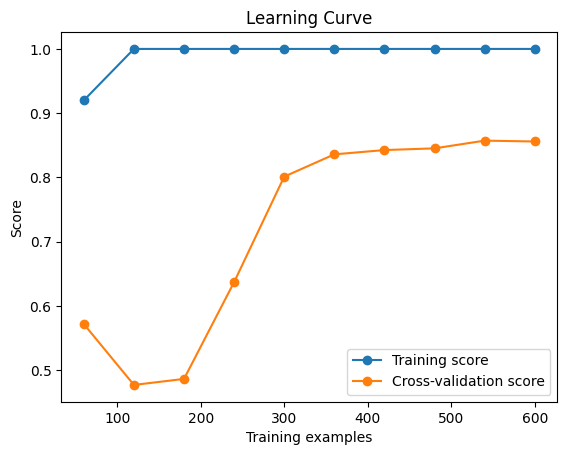

In [8]:
train_sizes, train_scores, test_scores = learning_curve(lgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (LightGBM) ---
[LightGBM] [Info] Number of positive: 343, number of negative: 273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 616, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556818 -> initscore=0.228259
[LightGBM] [Info] Start training from score 0.228259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

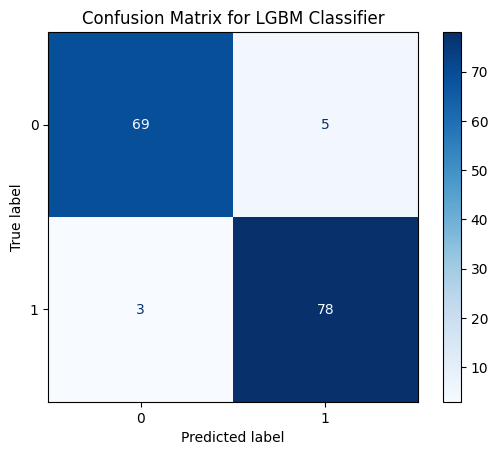


Displaying Learning Curve...


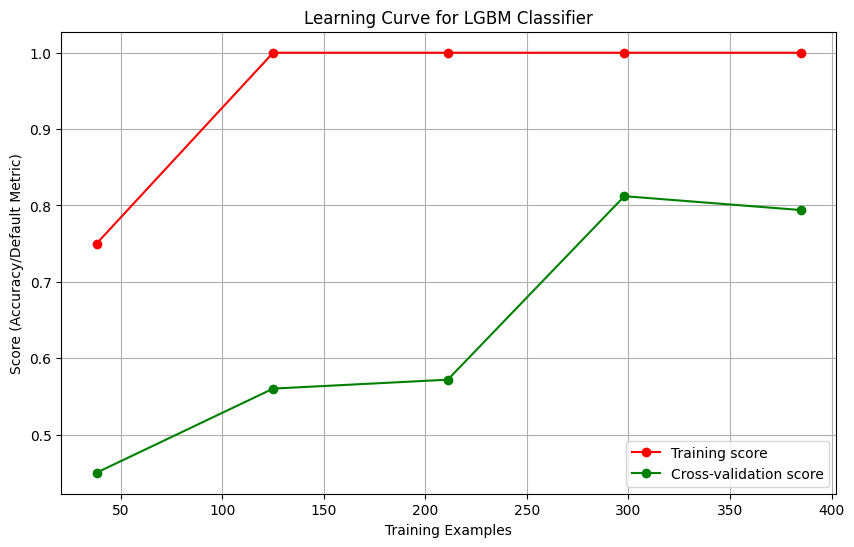


Displaying Feature Importances...


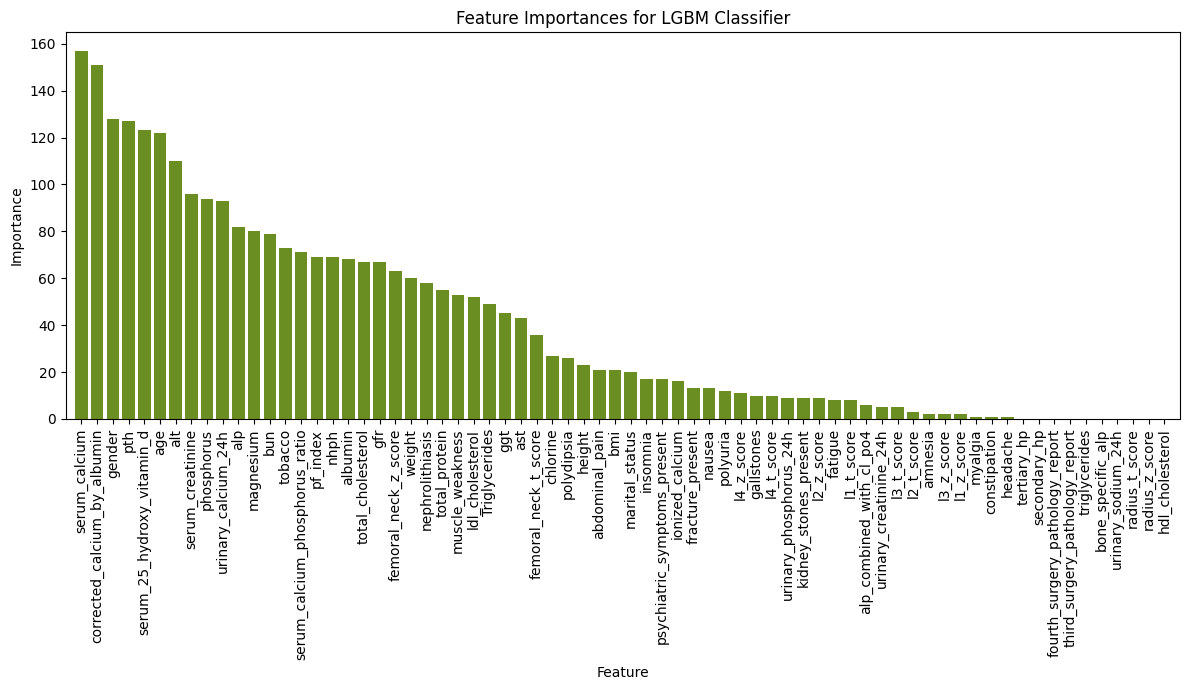


Displaying Histogram of Individual Tree Depths (LGBM)...


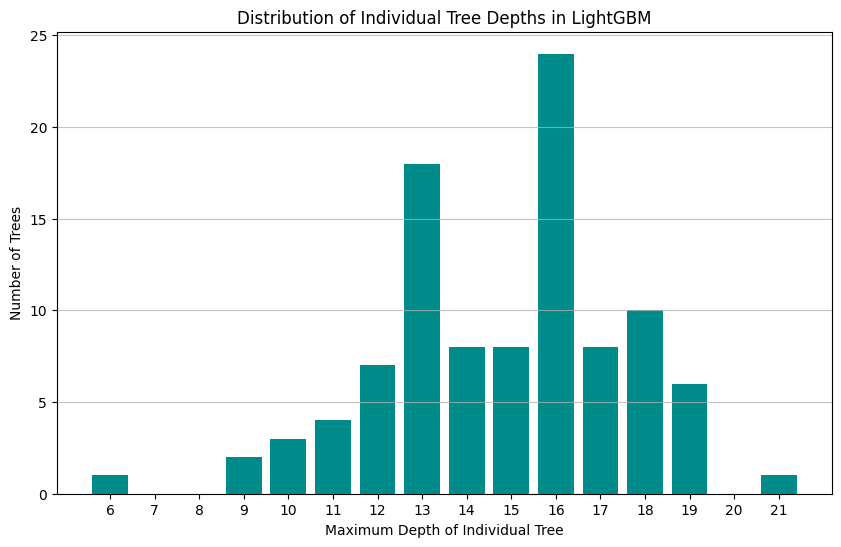


--- Generating Visualizations for Collected Metrics (LightGBM) ---


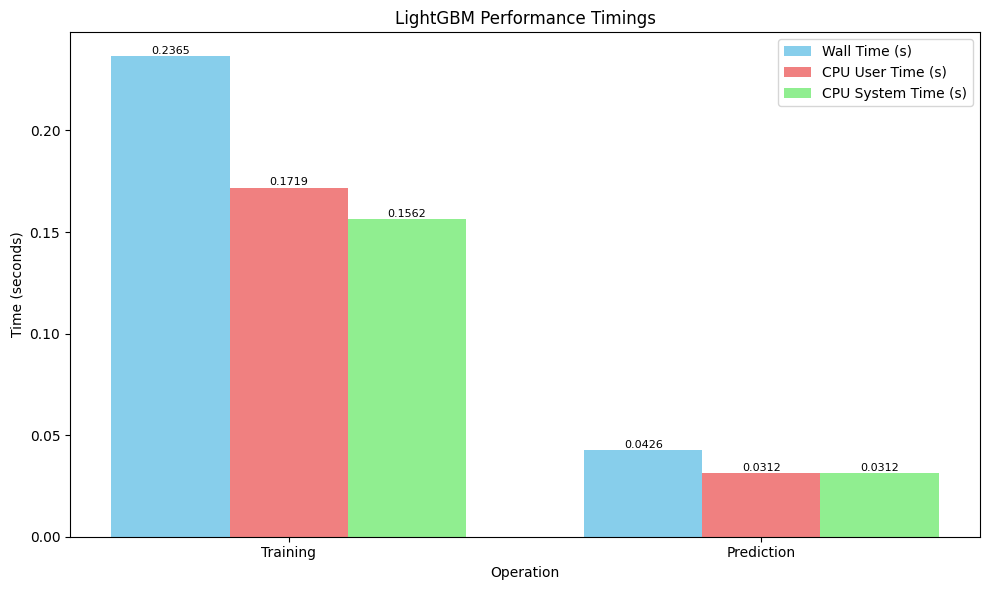

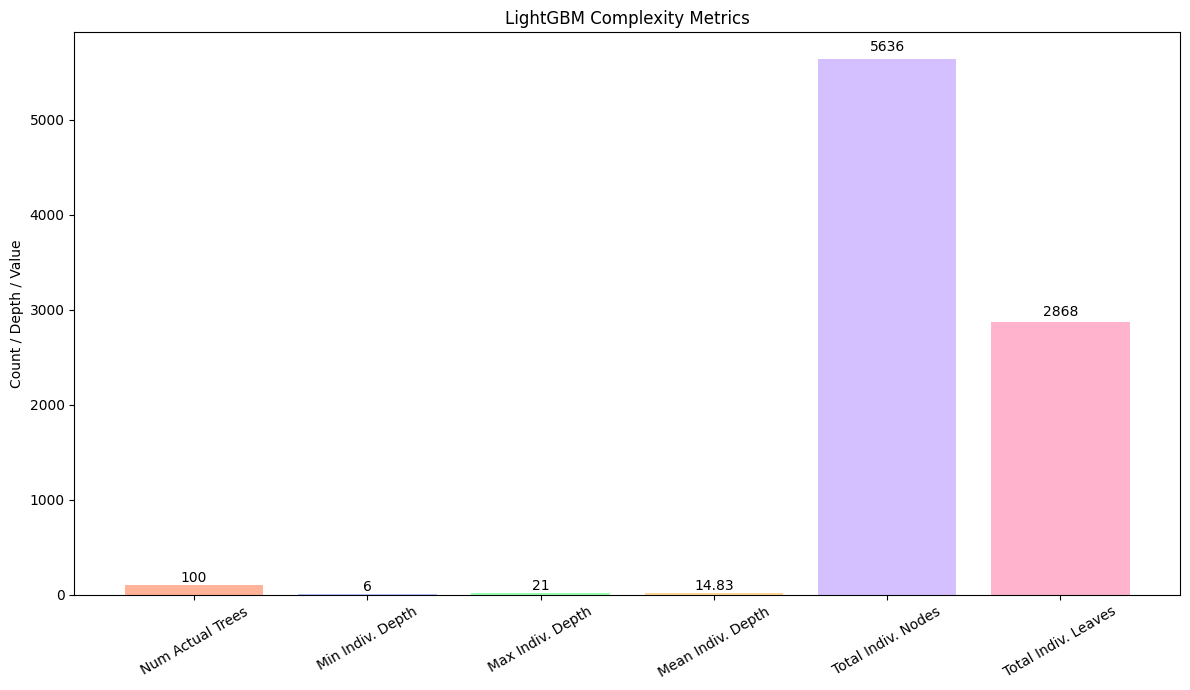

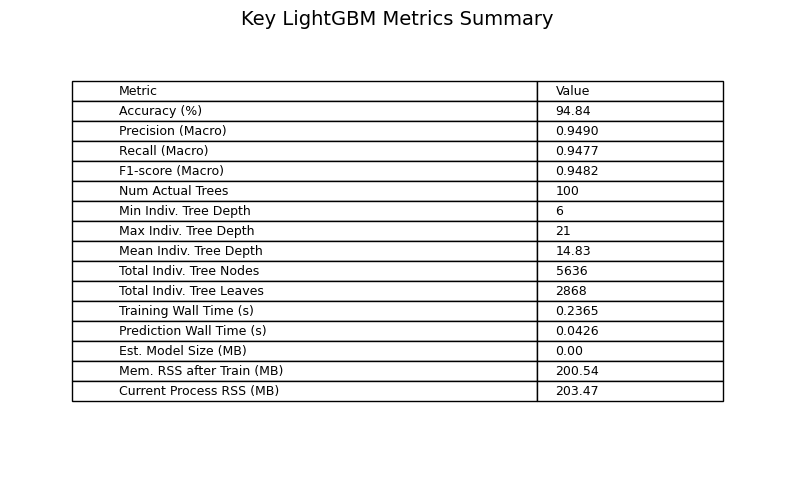


--- Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

# Attempt to import LightGBM
try:
    import lightgbm as lgb
except ImportError:
    print("LightGBM library not found. Please install it: pip install lightgbm")
    sys.exit()

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- Helper function to parse LightGBM tree structure ---
def get_lgbm_tree_properties(tree_structure_dict):
    """
    Recursively calculates max depth and node count for a LightGBM tree.
    Args:
        tree_structure_dict (dict): The 'tree_structure' part of a tree from dump_model().
    Returns:
        tuple: (max_depth, node_count)
    """
    if not tree_structure_dict: # Should not happen with valid tree structure
        return 0, 0

    node_count = 1 # Count current node

    if 'leaf_value' in tree_structure_dict: # It's a leaf node
        return 1, 1 # Depth of a leaf itself is 1 for this calculation method

    # It's a split node
    left_depth, left_nodes = 0, 0
    right_depth, right_nodes = 0, 0

    if 'left_child' in tree_structure_dict and tree_structure_dict['left_child']:
        left_depth, left_nodes = get_lgbm_tree_properties(tree_structure_dict['left_child'])
    
    if 'right_child' in tree_structure_dict and tree_structure_dict['right_child']:
        right_depth, right_nodes = get_lgbm_tree_properties(tree_structure_dict['right_child'])

    max_depth = 1 + max(left_depth, right_depth)
    node_count += (left_nodes + right_nodes)
    
    return max_depth, node_count


# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Convert class names from y to strings (used for confusion matrix display_labels)
class_names = [str(cls) for cls in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using LGBMClassifier as requested
# Add random_state for reproducibility. Other parameters can be added as needed.
lgb_classifier = lgb.LGBMClassifier(random_state=42, n_estimators=100) # n_estimators from user script

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (LightGBM) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

lgb_classifier.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else: # Default values if psutil not available
    all_metrics['training_cpu_time_user'] = 0
    all_metrics['training_cpu_time_system'] = 0
    all_metrics['memory_rss_after_training_mb'] = 0


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (LightGBM) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = lgb_classifier.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else: # Default values
    all_metrics['prediction_cpu_time_user'] = 0
    all_metrics['prediction_cpu_time_system'] = 0

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (LightGBM) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (LightGBM) ---")
all_metrics['n_actual_estimators'] = lgb_classifier.booster_.num_trees()
all_metrics['n_features'] = lgb_classifier.n_features_in_

print(f"Number of Actual Estimators (Trees Built): {all_metrics['n_actual_estimators']}")
print(f"Number of Features Seen: {all_metrics['n_features']}")

# Analyze individual trees from LightGBM's booster
tree_depths_lgbm = []
tree_node_counts_lgbm = []
tree_leaf_counts_lgbm = []

try:
    model_dump = lgb_classifier.booster_.dump_model()
    if 'tree_info' in model_dump and model_dump['tree_info']:
        for tree_data in model_dump['tree_info']:
            tree_leaf_counts_lgbm.append(tree_data.get('num_leaves', 0))
            if 'tree_structure' in tree_data and tree_data['tree_structure']:
                depth, nodes = get_lgbm_tree_properties(tree_data['tree_structure'])
                tree_depths_lgbm.append(depth)
                tree_node_counts_lgbm.append(nodes)
            else: # Fallback if tree_structure is empty or missing
                tree_depths_lgbm.append(0) # Or some other placeholder
                tree_node_counts_lgbm.append(tree_data.get('num_leaves',0)) # Approx. nodes with leaves if no structure
    else:
        print("No tree_info found in LightGBM model dump.")

except Exception as e:
    print(f"Could not parse LightGBM model dump for tree stats: {e}")


if tree_depths_lgbm:
    all_metrics['min_ind_tree_depth'] = np.min(tree_depths_lgbm)
    all_metrics['max_ind_tree_depth'] = np.max(tree_depths_lgbm)
    all_metrics['mean_ind_tree_depth'] = np.mean(tree_depths_lgbm)
    print(f"Min Individual Tree Depth: {all_metrics['min_ind_tree_depth']}")
    print(f"Max Individual Tree Depth: {all_metrics['max_ind_tree_depth']}")
    print(f"Mean Individual Tree Depth: {all_metrics['mean_ind_tree_depth']:.2f}")
else:
    all_metrics.update({k: 0 for k in ['min_ind_tree_depth', 'max_ind_tree_depth', 'mean_ind_tree_depth']})
    print("Individual tree depth stats not available.")

if tree_node_counts_lgbm:
    all_metrics['total_ind_tree_nodes'] = np.sum(tree_node_counts_lgbm)
    all_metrics['mean_ind_nodes_per_tree'] = np.mean(tree_node_counts_lgbm)
    print(f"Total Nodes across all Individual Trees: {all_metrics['total_ind_tree_nodes']}")
    print(f"Mean Nodes per Individual Tree: {all_metrics['mean_ind_nodes_per_tree']:.2f}")
else:
    all_metrics.update({k: 0 for k in ['total_ind_tree_nodes', 'mean_ind_nodes_per_tree']})
    print("Individual tree node count stats not available.")

if tree_leaf_counts_lgbm:
    all_metrics['total_ind_tree_leaves'] = np.sum(tree_leaf_counts_lgbm)
    all_metrics['mean_ind_leaves_per_tree'] = np.mean(tree_leaf_counts_lgbm)
    print(f"Total Leaves across all Individual Trees: {all_metrics['total_ind_tree_leaves']}")
    print(f"Mean Leaves per Individual Tree: {all_metrics['mean_ind_leaves_per_tree']:.2f}")
else:
    all_metrics.update({k: 0 for k in ['total_ind_tree_leaves', 'mean_ind_leaves_per_tree']})
    print("Individual tree leaf count stats not available.")


# Estimating model size
model_size_bytes = sys.getsizeof(lgb_classifier)
if hasattr(lgb_classifier, 'booster_') and lgb_classifier.booster_:
    # The booster object itself is a significant part.
    # A more accurate way for LightGBM is to save to file and check size,
    # but sys.getsizeof(booster_) gives some indication of its Python wrapper.
    model_size_bytes += sys.getsizeof(lgb_classifier.booster_)


all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics['current_process_rss_mb'] = 0
    all_metrics['current_process_vms_mb'] = 0

# --- 8. Visualizations (From User's Script and Adapted) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        unique_labels_train = np.unique(y_train)
        unique_labels_test = np.unique(y_test)
        all_unique_labels = np.unique(np.concatenate((unique_labels_train, unique_labels_test, np.unique(y_pred))))
        display_labels_cm = all_unique_labels if len(all_unique_labels) > 0 else class_names

        conf_matrix = confusion_matrix(y_test, y_pred, labels=display_labels_cm if len(display_labels_cm)>0 else None)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels_cm if len(display_labels_cm)>0 else ['N/A'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for LGBM Classifier')
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y)))
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            train_sizes, train_scores, test_scores = learning_curve(
                lgb_classifier, X, y, cv=n_splits_cv,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5) # Reduced points for faster plotting
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for LGBM Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation (min 5 samples required for cv=5).")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# Feature Importances for LightGBM
print("\nDisplaying Feature Importances...")
if hasattr(lgb_classifier, 'feature_importances_'):
    importances = lgb_classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    all_metrics['feature_importances'] = importances

    plt.figure(figsize=(12, 7))
    plt.title("Feature Importances for LGBM Classifier")
    plt.bar(range(X.shape[1]), importances[indices], color="olivedrab", align="center")
    if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    else:
        plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this classifier.")
    all_metrics['feature_importances'] = []

# Histogram of Individual Tree Depths (if available)
print("\nDisplaying Histogram of Individual Tree Depths (LGBM)...")
if tree_depths_lgbm and len(tree_depths_lgbm) > 0:
    plt.figure(figsize=(10, 6))
    min_d, max_d = min(tree_depths_lgbm), max(tree_depths_lgbm)
    # Ensure bins are correctly calculated, especially if all depths are the same
    if min_d == max_d:
        bins_hist = [min_d, min_d + 1] # Create a single bin
        plt.xticks([min_d])
    else:
        bins_hist = range(min_d, max_d + 2)
        plt.xticks(range(min_d, max_d + 1))

    plt.hist(tree_depths_lgbm, bins=bins_hist, align='left', rwidth=0.8, color='darkcyan')
    plt.title('Distribution of Individual Tree Depths in LightGBM')
    plt.xlabel('Maximum Depth of Individual Tree')
    plt.ylabel('Number of Trees')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
elif all_metrics.get('min_ind_tree_depth') is not None:
    print("Individual tree depths data processed but list might be empty or not calculated if parsing failed.")
else:
    print("Skipping Histogram of Individual Tree Depths: No data available.")


# --- 9. New Visualizations for Collected Metrics (Adapted for LightGBM) ---
print("\n--- Generating Visualizations for Collected Metrics (LightGBM) ---")

# Plot 1: Performance Timings (Same as before)
fig_perf_lgbm, ax_perf_lgbm = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf_lgbm.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf_lgbm.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf_lgbm.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf_lgbm.set_xlabel('Operation')
ax_perf_lgbm.set_ylabel('Time (seconds)')
ax_perf_lgbm.set_title('LightGBM Performance Timings')
ax_perf_lgbm.set_xticks(index)
ax_perf_lgbm.set_xticklabels(time_categories)
ax_perf_lgbm.legend()
for bar_group in [bar1, bar2, bar3]: # Add value labels
    for bar in bar_group:
        yval = bar.get_height()
        offset_factor = 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1)
        ax_perf_lgbm.text(bar.get_x() + bar.get_width()/2.0, yval + offset_factor, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf_lgbm.tight_layout()
plt.show()


# Plot 2: Model Complexity for LightGBM
fig_comp_lgbm, ax_comp_lgbm = plt.subplots(figsize=(12, 7))
complexity_metrics_names_lgbm = [
    'Num Actual Trees', 'Min Indiv. Depth', 'Max Indiv. Depth',
    'Mean Indiv. Depth', 'Total Indiv. Nodes', 'Total Indiv. Leaves'
]
complexity_values_lgbm = [
    all_metrics.get('n_actual_estimators', 0), all_metrics.get('min_ind_tree_depth', 0), all_metrics.get('max_ind_tree_depth', 0),
    all_metrics.get('mean_ind_tree_depth', 0), all_metrics.get('total_ind_tree_nodes', 0), all_metrics.get('total_ind_tree_leaves', 0)
]
colors_lgbm = ['#FFB399', '#ADC2FF', '#99FFB3', '#FFD699', '#D4BFFF', '#FFB3CC']

bars_comp_lgbm = ax_comp_lgbm.bar(complexity_metrics_names_lgbm, complexity_values_lgbm, color=colors_lgbm)
ax_comp_lgbm.set_ylabel('Count / Depth / Value')
ax_comp_lgbm.set_title('LightGBM Complexity Metrics')
ax_comp_lgbm.tick_params(axis='x', rotation=30)
for bar in bars_comp_lgbm: # Add value labels
    yval = bar.get_height()
    # Format as integer if it's a count, float if it's a mean
    label_format = f'{int(yval)}' if yval == int(yval) and 'Mean' not in bar.get_label() else f'{yval:.2f}'
    if bar.get_label() == 'Mean Indiv. Depth': label_format = f'{yval:.2f}' # Ensure mean depth is float
    ax_comp_lgbm.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * yval if yval >0 else 0.1 , label_format, ha='center', va='bottom')
fig_comp_lgbm.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for LightGBM
fig_table_lgbm, ax_table_lgbm = plt.subplots(figsize=(10, 6)) # Adjusted size for more rows
ax_table_lgbm.axis('tight')
ax_table_lgbm.axis('off')

table_data_lgbm = [
    ["Metric", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Num Actual Trees", f"{all_metrics.get('n_actual_estimators', 0)}"],
    ["Min Indiv. Tree Depth", f"{all_metrics.get('min_ind_tree_depth', 'N/A')}"],
    ["Max Indiv. Tree Depth", f"{all_metrics.get('max_ind_tree_depth', 'N/A')}"],
    ["Mean Indiv. Tree Depth", f"{all_metrics.get('mean_ind_tree_depth', 0.0):.2f}"],
    ["Total Indiv. Tree Nodes", f"{all_metrics.get('total_ind_tree_nodes', 'N/A')}"],
    ["Total Indiv. Tree Leaves", f"{all_metrics.get('total_ind_tree_leaves', 'N/A')}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_lgbm.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_lgbm = ax_table_lgbm.table(cellText=table_data_lgbm, colLabels=None, cellLoc='left', loc='center', colWidths=[0.5, 0.2])
table_lgbm.auto_set_font_size(False)
table_lgbm.set_fontsize(9)
table_lgbm.scale(1.2, 1.2)
ax_table_lgbm.set_title('Key LightGBM Metrics Summary', fontsize=14, y=0.95) # Adjusted title position
plt.show()

print("\n--- Analysis Complete ---")
